<a href="https://colab.research.google.com/github/Nikhild1093/Nikhild1093/blob/main/Customer_Segmentation_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

Data Overview

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.shape

(200, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Feature Selection

In [14]:
X = data.iloc[:,[3,4]].values
X[1]

array([15, 81])

Choosing the number of clusters using WCSS -
Within clusters sum of squares

In [20]:
#Finding WCSS value of different clusters using Elbow graph

wcss =[]

for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=40)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

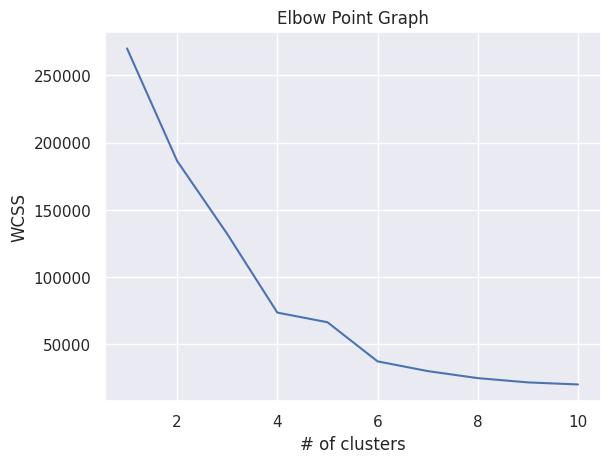

In [21]:
#Plot elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters is 5.
Training the K-Means model with 5 clusters

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)

#return a label for each datapoint based on its cluster
Y = kmeans.fit_predict(X)

In [23]:
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

Visualizing the clusters

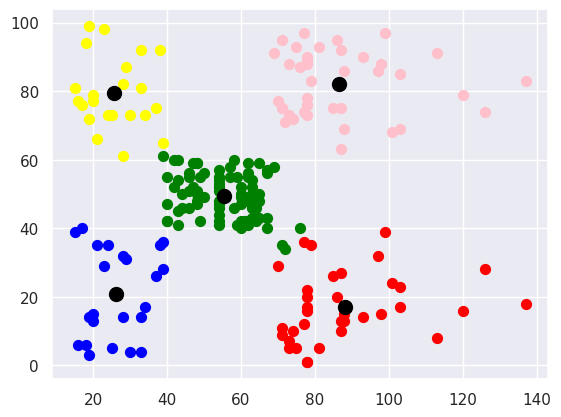

In [25]:
plt.scatter(X[Y==0,0], X[Y==0,1],s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1],s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1],s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1],s=50, c='pink', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1],s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='black', label='Centroid')